In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('./data/creditcard_2023.csv')

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df_raw.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df_raw.isnull().sum().sum()

np.int64(0)

In [6]:
y = df_raw['Class']

In [7]:
X = df_raw.drop(['Class','id'],axis=1)

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


<Axes: >

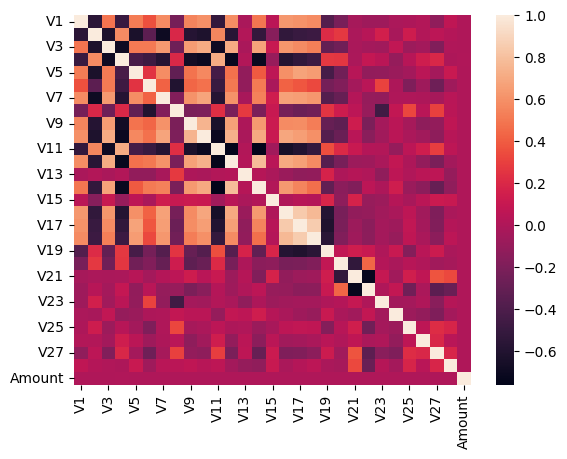

In [9]:
sns.heatmap(X.corr())

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Variance Inflation Factor
# We usually check VIF on the numeric features only
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    # VIF = 1 / (1 - R^2)
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data.sort_values(by="VIF", ascending=False)


def remove_redundant_features(X,VIF_tol=10, disp=False):
    n = X.shape[1]
    while True:
        # Get VIF
        vif_scores = calculate_vif(X)

        if disp:
            print(vif_scores)
            
        # Remove redundant features
        X = X.drop(vif_scores[vif_scores["VIF"]>VIF_tol]["feature"],axis=1)

        if n == X.shape[1]:
            break
        n = X.shape[1]    
    return X

In [34]:
# Remove redundant features
X = remove_redundant_features(X,disp=True,VIF_tol=5)

   feature       VIF
16     V17  6.536296
15     V16  4.891915
11     V12  4.039609
17     V18  4.035013
9      V10  3.953037
13     V14  3.912997
20     V21  3.575841
10     V11  3.376447
3       V4  3.067163
6       V7  3.055088
1       V2  3.034875
2       V3  3.022687
8       V9  2.970363
4       V5  2.894080
21     V22  2.733672
7       V8  2.722727
5       V6  2.506356
0       V1  2.105774
18     V19  2.014012
19     V20  1.790715
22     V23  1.579814
26     V27  1.560585
24     V25  1.382205
27     V28  1.275452
14     V15  1.165097
12     V13  1.153574
23     V24  1.133899
25     V26  1.112986
28  Amount  1.000015
   feature       VIF
15     V16  4.159496
11     V12  3.982584
9      V10  3.947941
13     V14  3.910876
19     V21  3.566510
10     V11  3.367656
16     V18  3.186967
3       V4  3.056020
6       V7  3.023881
2       V3  3.022622
1       V2  2.966536
8       V9  2.930765
4       V5  2.756915
7       V8  2.717080
20     V22  2.714394
5       V6  2.504967
0       V1  2

In [35]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


<Axes: xlabel='Class', ylabel='Count'>

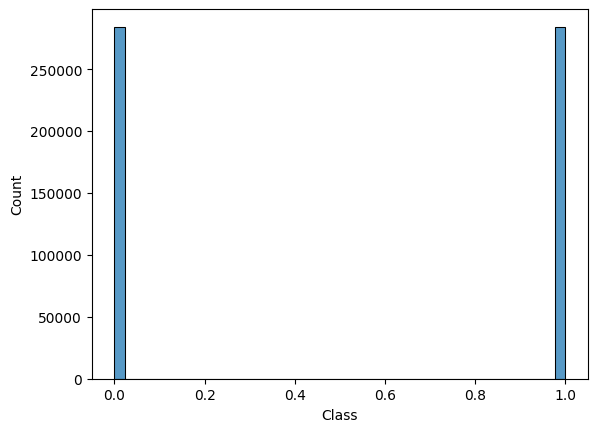

In [36]:
sns.histplot(y)

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# !pip install xgboost

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
# Function to evaluate model
from numpy import mean, std


def evaluate_model(model,X_train,y_train,X_test,y_test, cross_val=False,cv=5):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    if cross_val:
        # evaluate model
        scores = cross_val_score(
            model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # accuracy
        print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
            (mean(scores), std(scores)))
    else:
        print(f'Accuracy: {accuracy_score(y_test,y_pred):.3f}')
    report = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    return model,report

# Function to plot ROC AUC curve
def model_eval_roc_auc(model,X_test,y_test):
    y_probabs = model.predict_proba(X_test)[:,1]
    fpr,tpr, _ =roc_curve(y_test,y_probabs)
    roc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'AUC = {roc:.3f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [41]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [42]:
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])
print("Percentage of fraud cases in training set: {:.4f}%".format((y_train.sum()/y_train.shape[0])*100))
print("Percentage of fraud cases in testing set: {:.4f}%".format((y_test.sum()/y_test.shape[0])*100))

Number of training samples: 454904
Number of testing samples: 113726
Percentage of fraud cases in training set: 50.0000%
Percentage of fraud cases in testing set: 50.0000%


In [43]:
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42

    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'Support Vector Machine': SVC(
        kernel='rbf',
        probability=True,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

Evaluating Logistic Regression...
Accuracy: 0.962


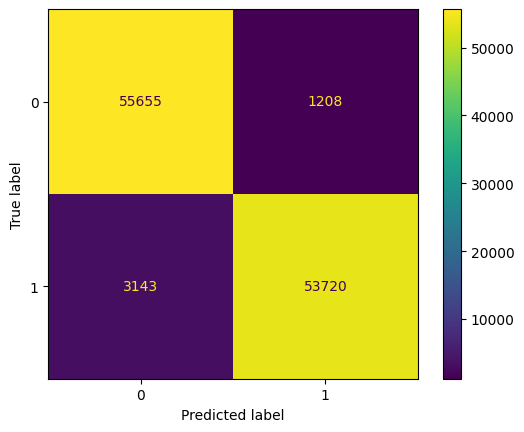

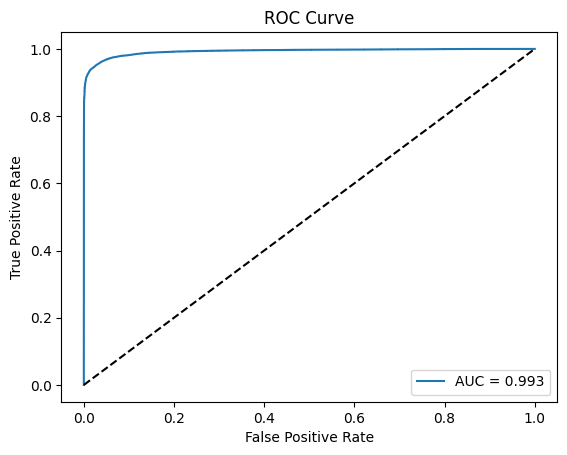

Evaluating Decision Tree...
Accuracy: 0.986


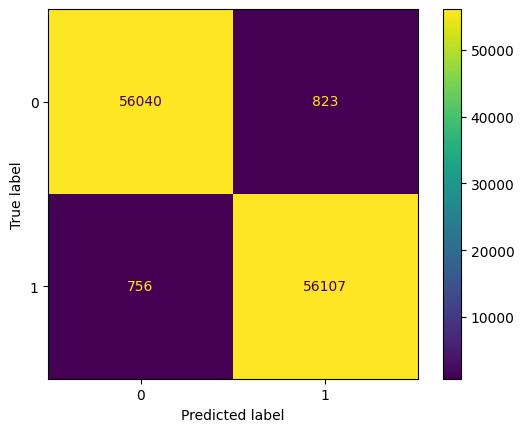

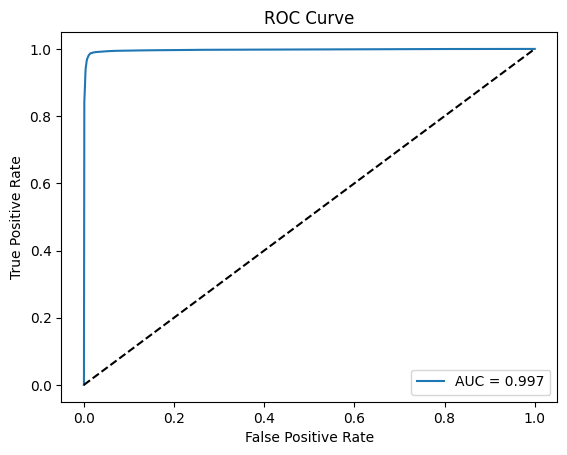

Evaluating Random Forest...
Accuracy: 0.949


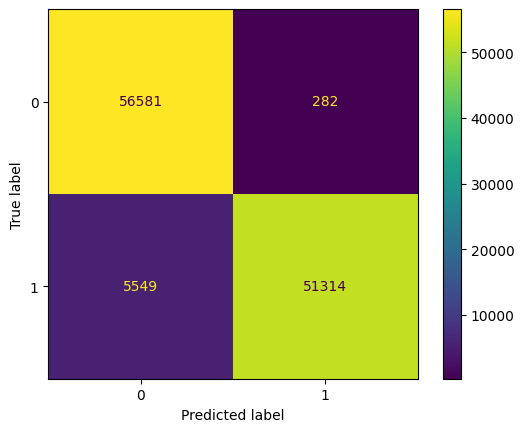

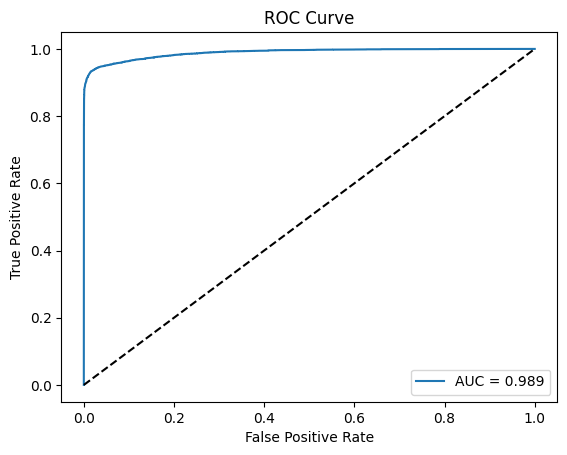

Evaluating Gradient Boosting...
Accuracy: 0.984


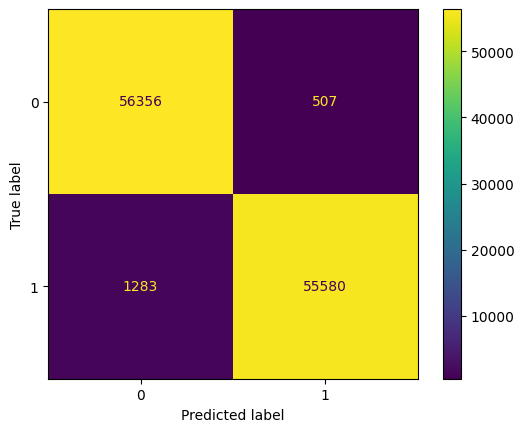

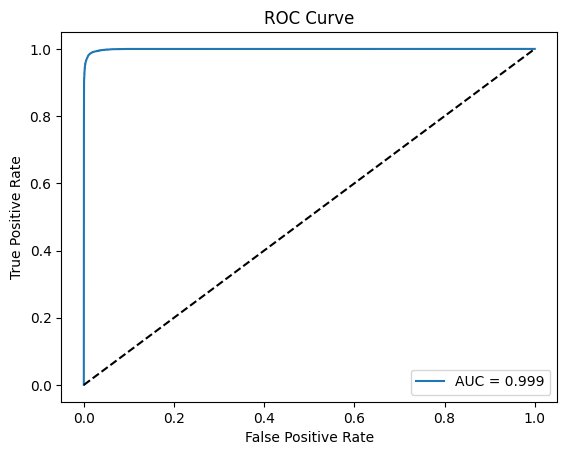

Evaluating Support Vector Machine...


In [ ]:
results = {}
for model_name, model_class in models.items():
    print(f"Evaluating {model_name}...")
    model,report = evaluate_model(model_class,X_train= X_train, y_train= y_train, X_test= X_test, y_test= y_test)
    model_eval_roc_auc(model, X_test, y_test)
    results[model_name] = report